In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pylab 

In [127]:
df=pd.read_csv('Churn_Modelling.csv')

In [128]:
headers=df.columns
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [129]:
df=df[['CustomerId','CreditScore','Tenure','Balance','EstimatedSalary','Exited']]

In [130]:
df.isnull().sum()

CustomerId         0
CreditScore        0
Tenure             0
Balance            0
EstimatedSalary    0
Exited             0
dtype: int64

In [131]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [132]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)

## Standard Scalar

In [133]:
scalar=StandardScaler()

train_Transformed=scalar.fit_transform(X_train)
test_Transformed=scalar.transform(X_test)

print(test_Transformed)
print(train_Transformed)

[[-0.04386283 -0.58071682 -0.68234612  0.32917556 -1.02616335]
 [ 0.64811037 -0.29994111 -1.37403521 -1.21648805  0.78471844]
 [ 0.43503953 -0.52872132 -0.33650158 -1.21648805 -0.73575756]
 ...
 [-1.608625   -0.65351053  1.73856568  0.55175342  0.81656849]
 [ 0.85323634 -2.22377473  0.70103205  0.03640766 -0.89395007]
 [-1.2416782   0.55278515 -0.33650158  0.62979252 -0.42439064]]
[[-0.41394281  1.67588802  0.00934296  0.47861826  1.50493673]
 [ 1.64158307  0.30320673  1.04687659 -0.046891   -1.31177144]
 [ 1.05487943 -0.10235819 -0.33650158  0.71243126 -1.32081469]
 ...
 [-1.63341076  0.86475817 -1.37403521 -1.21648805 -0.15299072]
 [ 1.63702316  0.15761932  1.04687659  1.82384377 -0.06143595]
 [ 0.21876556  0.46959234 -1.37403521  1.14750499 -0.82198396]]


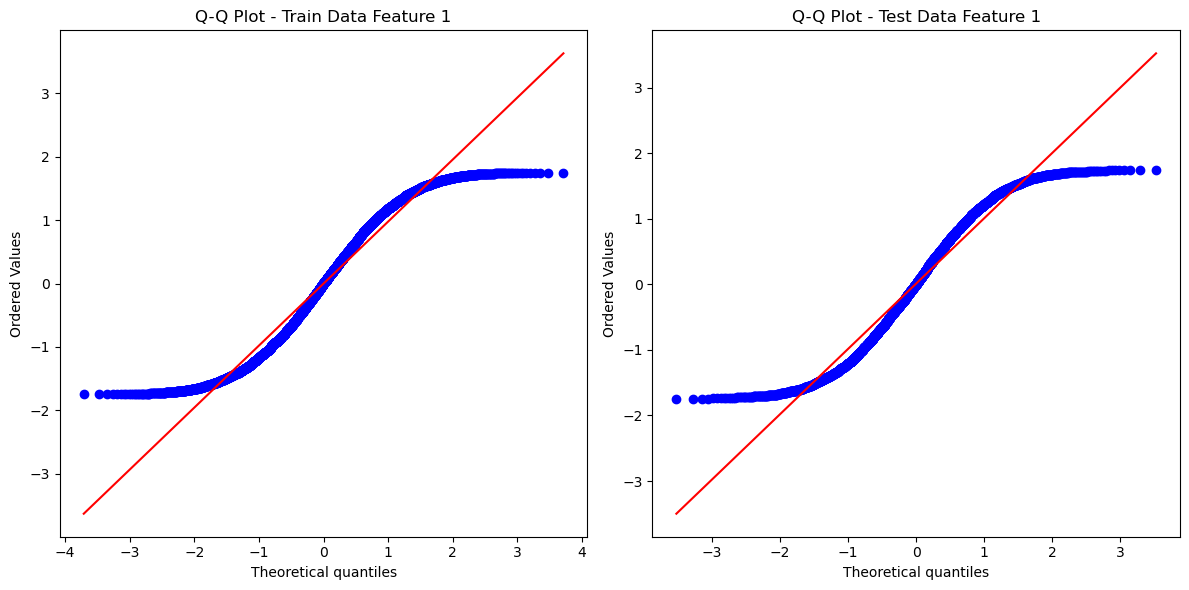

In [134]:
plt.figure(figsize=(12, 6))

# For train data
plt.subplot(1, 2, 1)
stats.probplot(train_Transformed[:, 0], dist="norm", plot=plt)  # For the first feature in train
plt.title('Q-Q Plot - Train Data Feature 1')

# For test data
plt.subplot(1, 2, 2)
stats.probplot(test_Transformed[:, 0], dist="norm", plot=plt)  # For the first feature in test
plt.title('Q-Q Plot - Test Data Feature 1')

plt.tight_layout()
plt.show()


## Min Max Scaler

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [136]:
min_max=MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(X_train), columns=X_train.columns)
df_minmax.head()

,CustomerId,CreditScore,Tenure,Balance,EstimatedSalary
0,0.381382,0.926,0.5,0.422719,0.939995
1,0.969310,0.662,0.8,0.291670,0.126088
2,0.801499,0.584,0.4,0.481026,0.123474
3,0.916513,0.524,0.8,0.470270,0.270360
4,0.682450,0.472,0.9,0.000000,0.034445


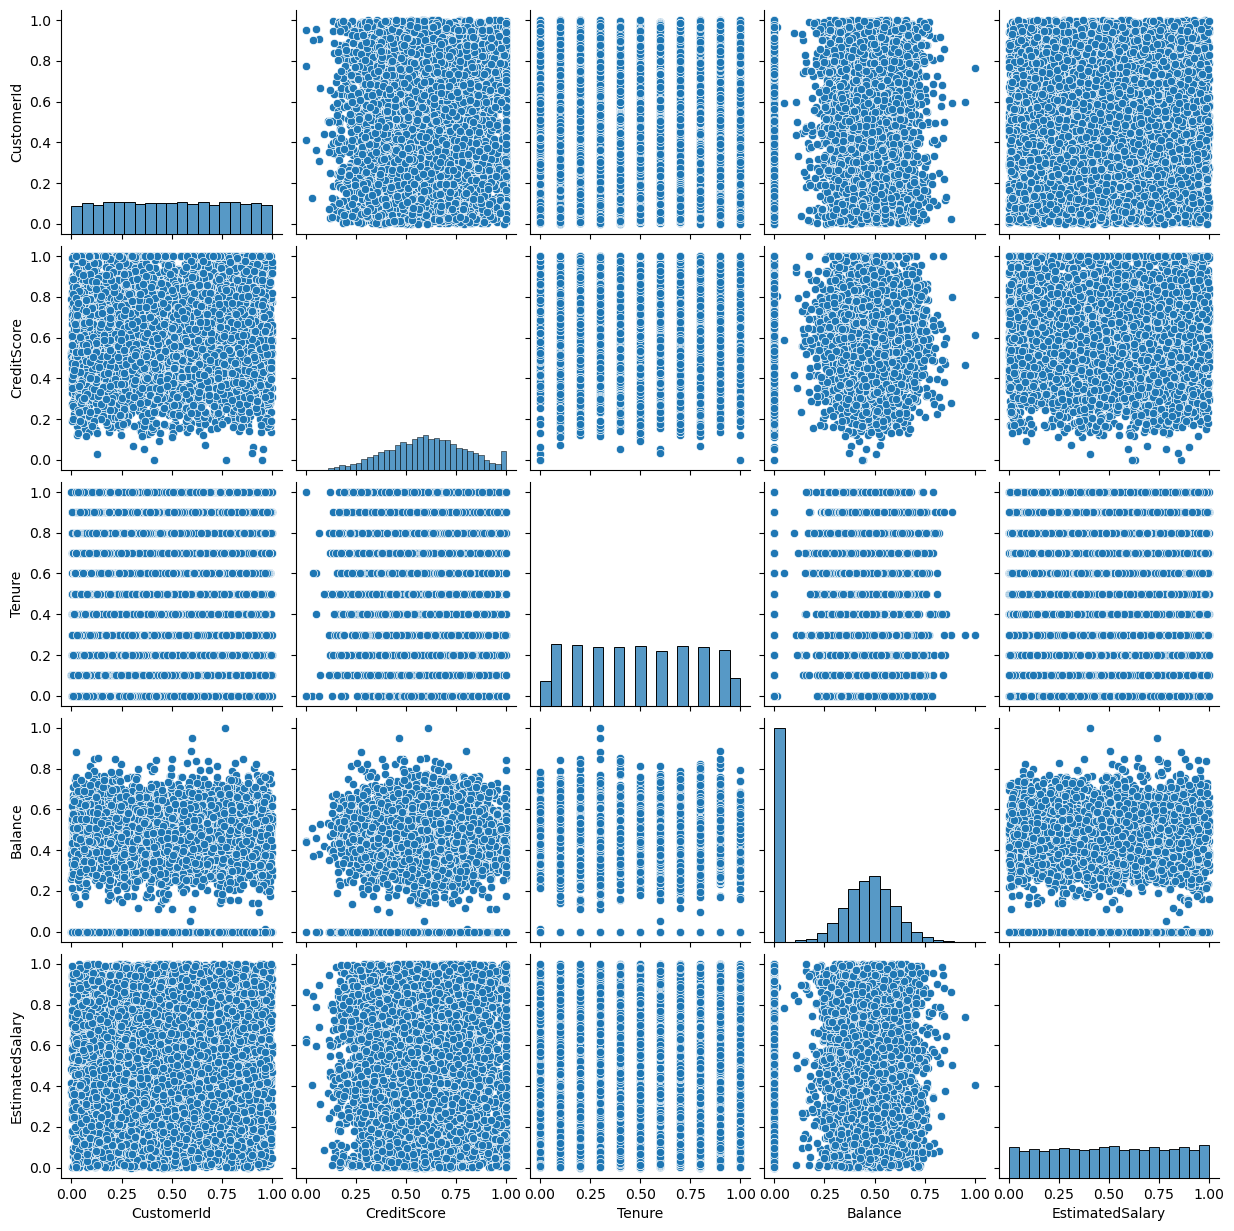

In [137]:
sns.pairplot(df_minmax)

In [140]:
print(df_minmax.columns)

Index(['CustomerId', 'CreditScore', 'Tenure', 'Balance', 'EstimatedSalary'], dtype='object')


(array([  5.,   6.,  29.,  81., 109., 184., 261., 351., 424., 568., 570.,
        672., 662., 643., 569., 450., 387., 291., 161., 277.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

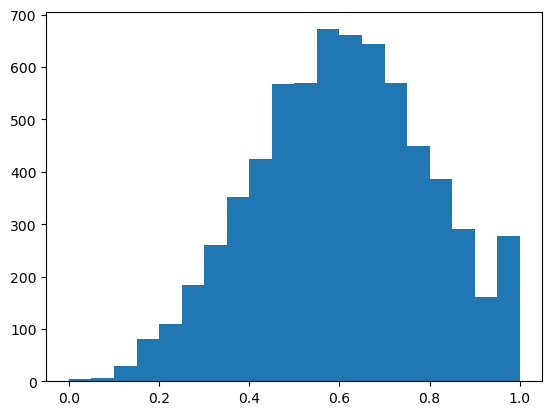

In [142]:
plt.hist(df_minmax['CreditScore'],bins=20)


(array([307., 336., 322., 350., 358., 319., 341., 354., 331., 330., 353.,
        340., 351., 331., 317., 346., 345., 318., 337., 314.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

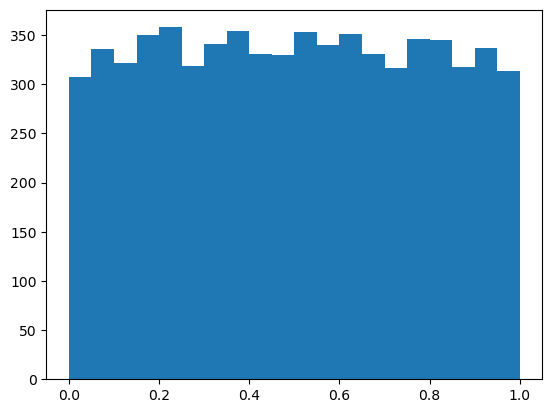

In [143]:
plt.hist(df_minmax['CustomerId'],bins=20)

(array([283.,   0., 714.,   0., 704.,   0., 673.,   0., 676.,   0., 688.,
          0., 629.,   0., 690.,   0., 677.,   0., 646., 320.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

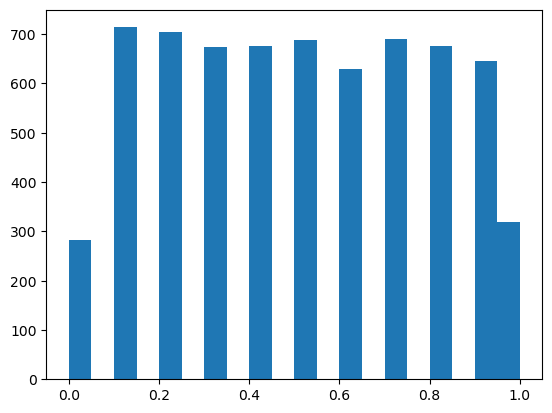

In [144]:
plt.hist(df_minmax['Tenure'],bins=20)

##### Robust Scaler

In [146]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [150]:
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
df_robust_scaler.head()

,CustomerId,CreditScore,Tenure,Balance,EstimatedSalary
0,-0.238850,1.201493,0.0,0.075822,0.877472
1,0.942814,0.216418,0.6,-0.181525,-0.763720
2,0.605535,-0.074627,-0.2,0.190323,-0.768989
3,0.836697,-0.298507,0.6,0.169199,-0.472803
4,0.366259,-0.492537,0.8,-0.754289,-0.948510


In [151]:
scaler.transform(X_test)

array([[-0.02610106, -0.41791045, -0.4       ,  0.00263835, -0.59730647],
       [ 0.3716949 , -0.21641791, -0.8       , -0.75428935,  0.45782763],
       [ 0.24920645, -0.38059701, -0.2       , -0.75428935, -0.42809771],
       ...,
       [-0.92563891, -0.47014925,  1.        ,  0.11163707,  0.47638548],
       [ 0.48961606, -1.59701493,  0.4       , -0.14073316, -0.52027066],
       [-0.7146915 ,  0.39552239, -0.2       ,  0.14985364, -0.24667568]])

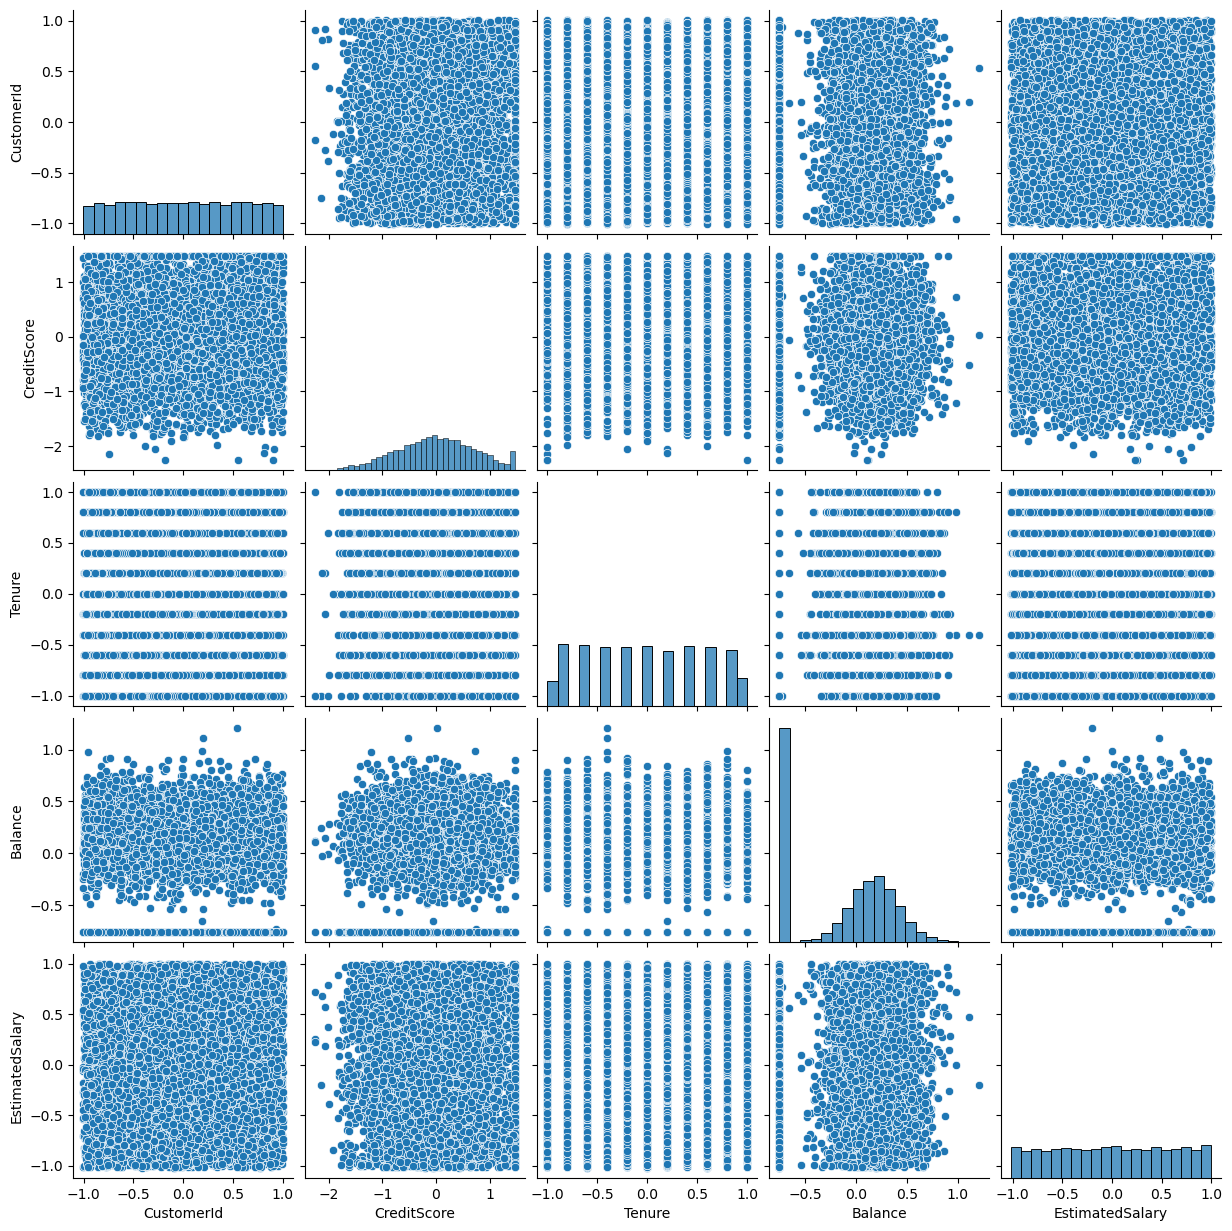

In [152]:

sns.pairplot(df_robust_scaler)

(array([  5.,   6.,  29.,  81., 109., 184., 261., 351., 424., 568., 570.,
        672., 662., 643., 569., 450., 387., 291., 161., 277.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

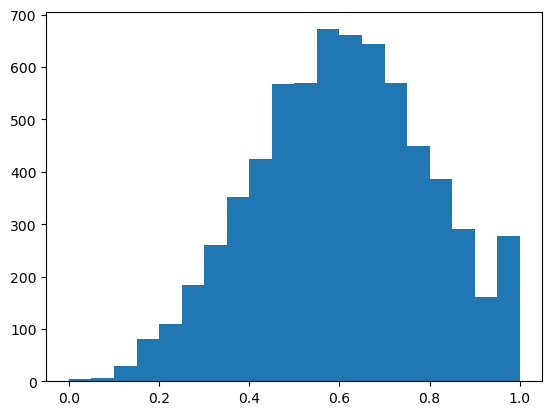

In [153]:
plt.hist(df_minmax['CreditScore'],bins=20)


(array([283.,   0., 714.,   0., 704.,   0., 673.,   0., 676.,   0., 688.,
          0., 629.,   0., 690.,   0., 677.,   0., 646., 320.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

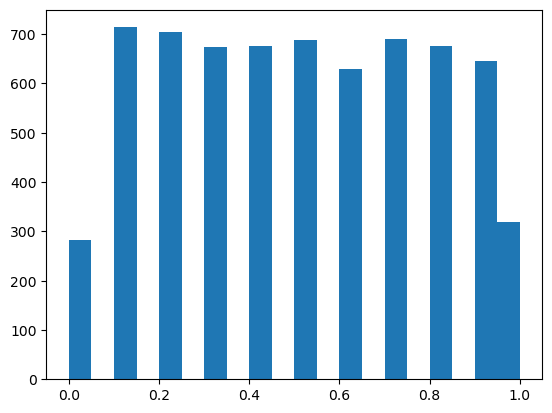

In [154]:
plt.hist(df_minmax['Tenure'],bins=20)


#### Guassian Transformation

In [159]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [160]:
print(df.columns)

Index(['CustomerId', 'CreditScore', 'Tenure', 'Balance', 'EstimatedSalary',
       'Exited'],
      dtype='object')


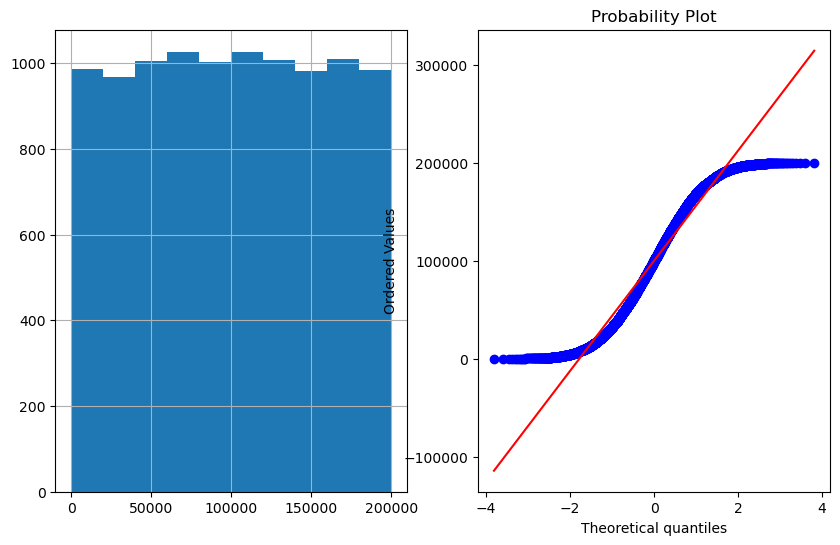

In [165]:
plot_data(df,'EstimatedSalary')

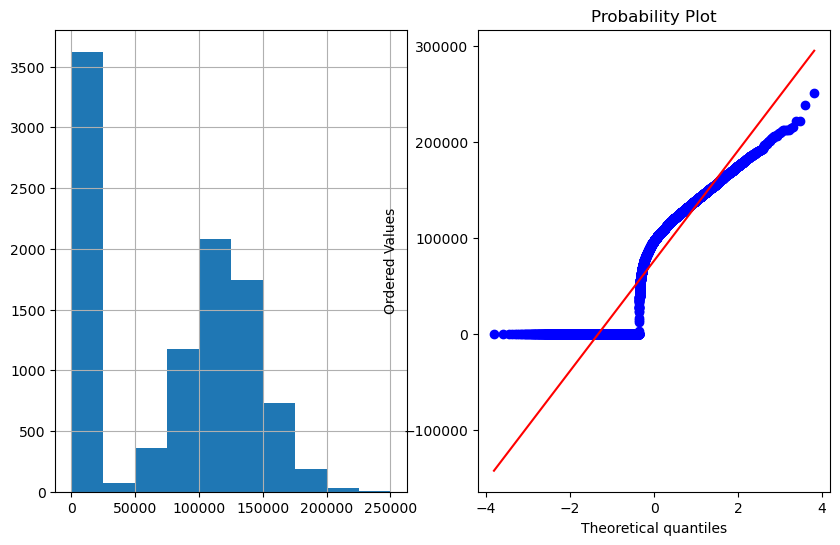

In [164]:
plot_data(df,'Balance')

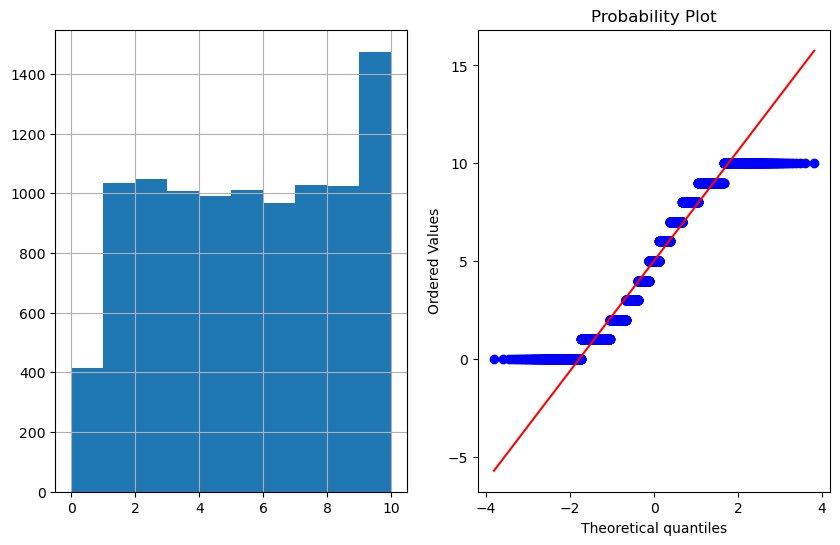

In [163]:
plot_data(df,'Tenure')

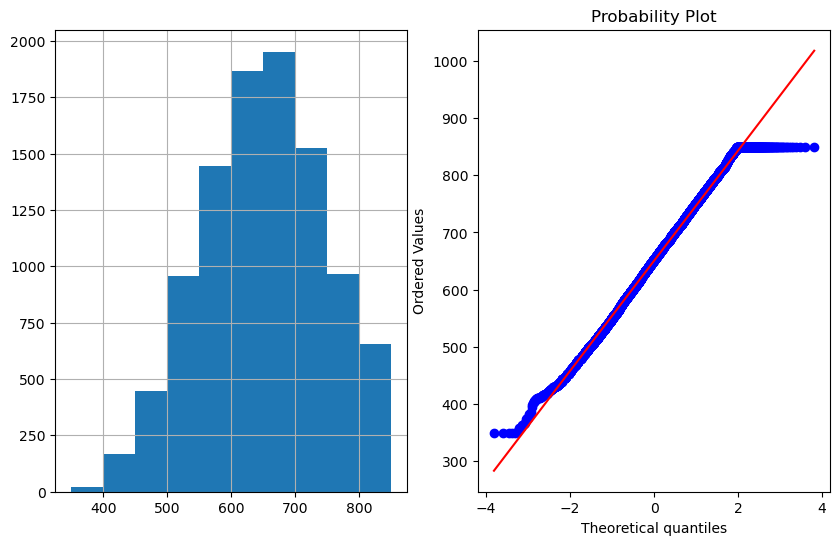

In [162]:
plot_data(df,'CreditScore')

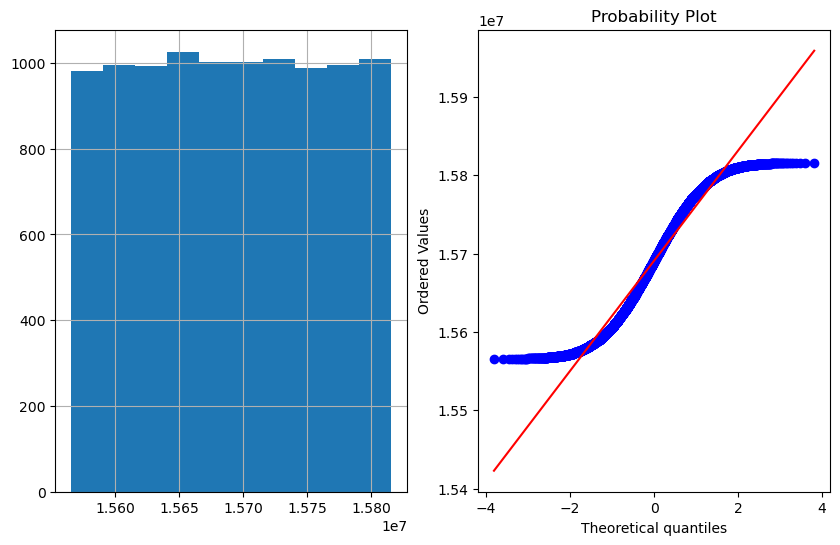

In [161]:
plot_data(df,'CustomerId')

#### Logarithmic Transformation

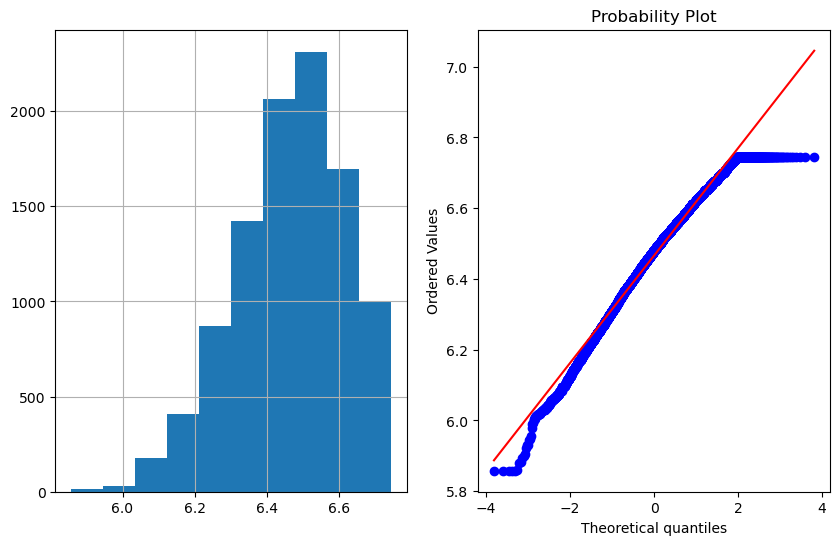

In [170]:
df['CreditScore_log']=np.log(df['CreditScore'])
plot_data(df,'CreditScore_log')

#### Reciprocal Transformation

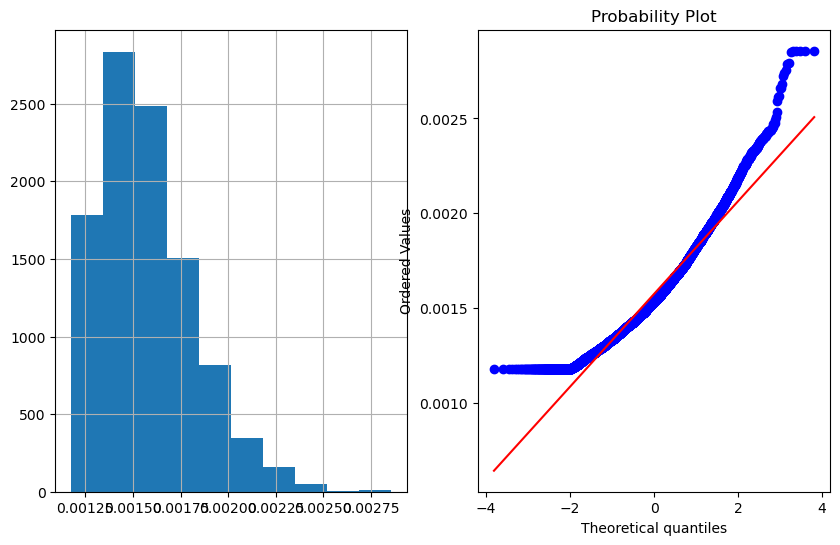

In [171]:
df['CreditScore_reciprocal']=1/df.CreditScore
plot_data(df,'CreditScore_reciprocal')

##Square Root Transformation

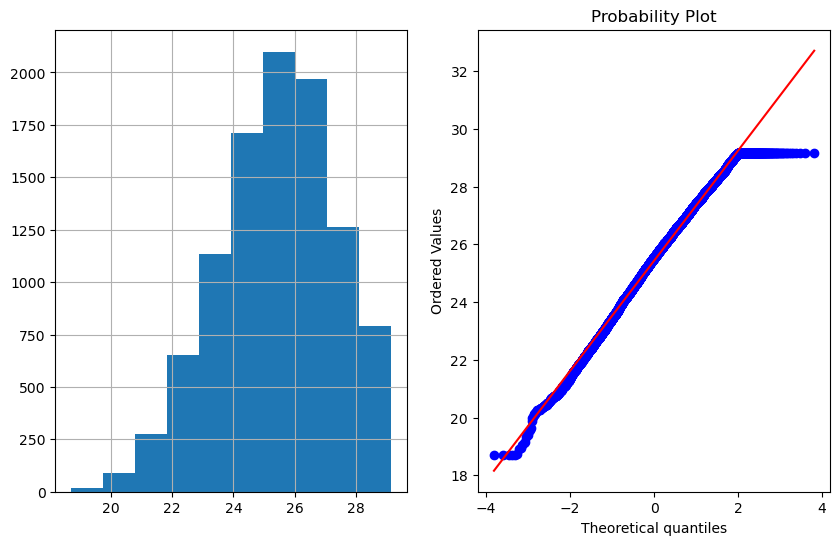

In [172]:
df['CreditScore_sqaure']=df.CreditScore**(1/2)
plot_data(df,'CreditScore_sqaure')

## Exponential Transformation

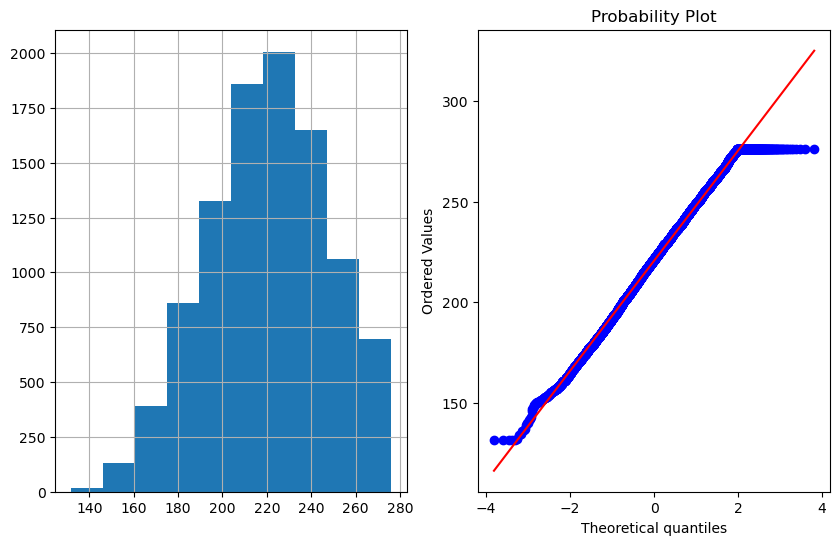

In [173]:
df['CreditScore_exponential']=df.CreditScore**(1/1.2)
plot_data(df,'CreditScore_exponential')

## BoxCOx Transformation

In [175]:
df['CreditScore_Boxcox'],parameters=stats.boxcox(df['CreditScore'])
print(parameters)

1.1288549262764165


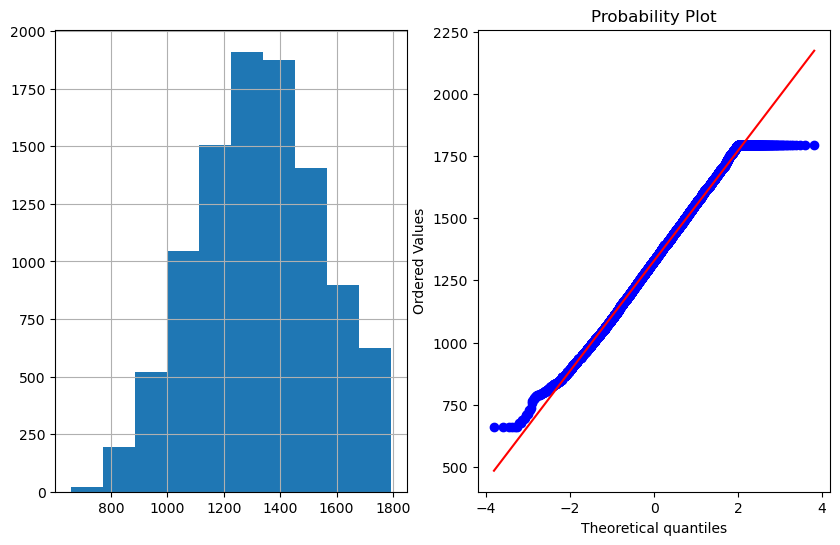

In [176]:
plot_data(df,'CreditScore_Boxcox')

## Fare

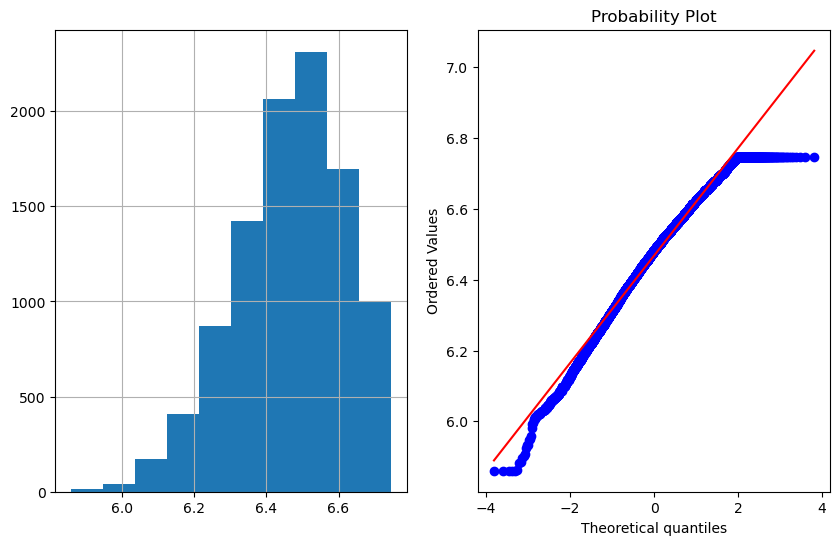

In [179]:

df['CreditScore_log']=np.log1p(df['CreditScore'])
plot_data(df,'CreditScore_log')

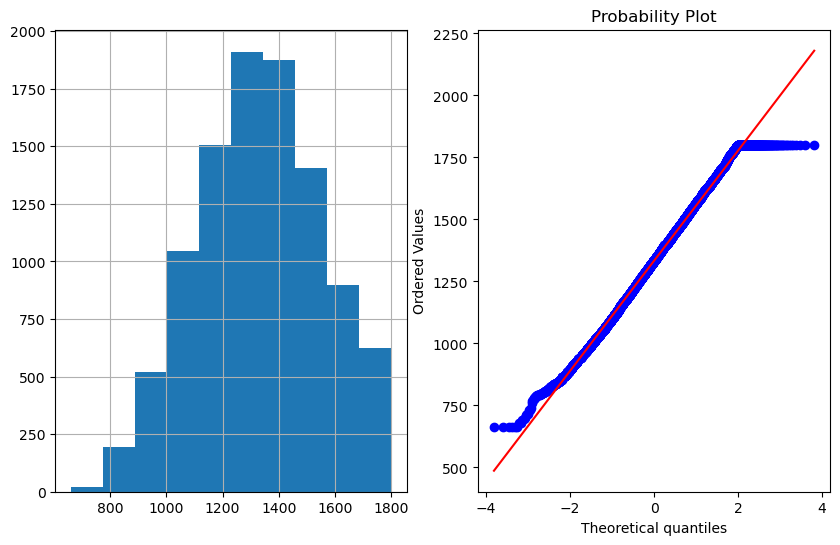

In [181]:
df['CreditScore_Boxcox'],parameters=stats.boxcox(df['CreditScore']+1)
plot_data(df,'CreditScore_Boxcox')